# Examples shown in Lecturt 8

### appromimating PI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate

fontsize = 16

def PI_Approx(N):
    np.random.seed(42)
    inside = 0
    PI_approx = []
    rand = []
    rand2 = []

    for i in range(1, N):
        r = np.random.uniform(low=-1, high=1)
        rand.append(r)
        r2 = np.random.uniform(low=-1, high=1)
        rand2.append(r2)
        if (r**2 + r2**2) < 1:
            inside += 1
        PI_approx.append(4 * inside / i)

        if i in [100, 1000, 10000]:
            circle1 = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2, alpha=0.5)
            fig, ax = plt.subplots(figsize=(7, 7))
            color = np.array(np.array(rand) * np.array(rand2) < 1)
            plt.scatter(rand, rand2, c=color, cmap='bwr', alpha=0.5)
            ax.add_patch(circle1)
            plt.title(
                r"$N = %s$, $n = %s$ $\Rightarrow \pi \approx \frac{4n}{N} \approx %.2f$"
                % (i, inside, 4 * inside / i),
                fontsize=fontsize
            )
            plt.xlim(-1, 1)
            plt.ylim(-1, 1)
            plt.xlabel('x', fontsize=fontsize)
            plt.ylabel('y', fontsize=fontsize)
            plt.savefig(f"MC_Circle_N={i}_pts_{inside}.png", bbox_inches='tight', dpi=300)
            plt.close(fig)

    df = pd.DataFrame(PI_approx, columns=['Estimated PI'])
    df['Real PI'] = np.pi
    df['Error'] = np.pi - df['Estimated PI']

    return df

# Example usage:
if __name__ == "__main__":
    result = PI_Approx(10001)
    print(result.head())

   Estimated PI   Real PI     Error
0           4.0  3.141593 -0.858407
1           4.0  3.141593 -0.858407
2           4.0  3.141593 -0.858407
3           3.0  3.141593  0.141593
4           3.2  3.141593 -0.058407


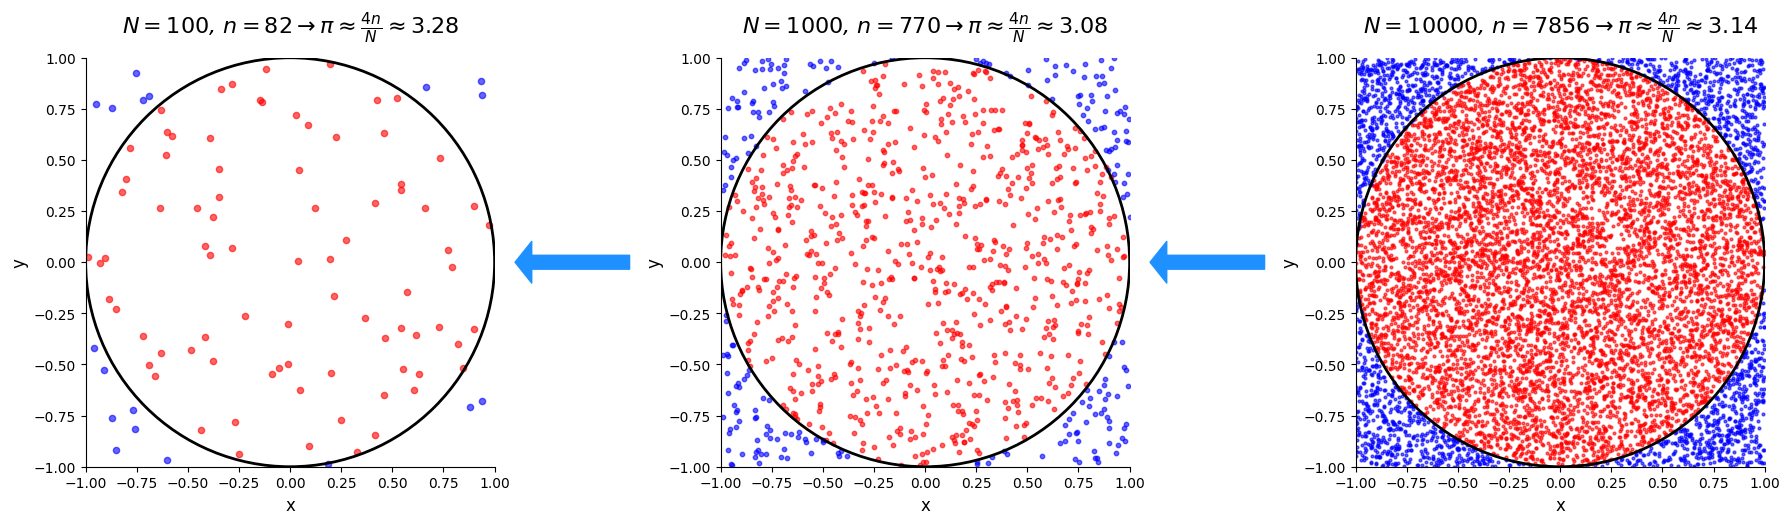

In [2]:
from matplotlib.patches import Circle

# For reproducibility
np.random.seed(42)

# Sample sizes for the three panels
Ns = [100, 1000, 10000]

# Prepare figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, N in enumerate(Ns):
    ax = axes[idx]    
    # Generate random points in [-1, 1] x [-1, 1]
    x = np.random.uniform(-1, 1, N)
    y = np.random.uniform(-1, 1, N)
    inside = x**2 + y**2 < 1
    n_inside = np.sum(inside)
    pi_est = 4 * n_inside / N

    # Plot points
    ax.scatter(x[inside], y[inside], color='red', s=20 if N==100 else 10 if N==1000 else 4, alpha=0.6)
    ax.scatter(x[~inside], y[~inside], color='blue', s=20 if N==100 else 10 if N==1000 else 4, alpha=0.6)

    # Draw the circle
    circle = Circle((0, 0), 1, edgecolor='black', facecolor='none', linewidth=2, zorder=3)
    ax.add_patch(circle)
    
    # Formatting
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("y", fontsize=12)
    ax.tick_params(labelsize=10)
    
    # Title
    ax.set_title(r"$N = {}$, $n = {} \rightarrow \pi \approx \frac{{4n}}{{N}} \approx {:.2f}$".format(
        N, n_inside, pi_est
    ), fontsize=16, y=1.04, fontstyle='italic')
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Draw arrows between plots
for i in range(2):
    axes[i].annotate(
        '', xy=(1.05, 0.5), xycoords='axes fraction',
        xytext=(1.33, 0.5), textcoords='axes fraction',
        arrowprops=dict(facecolor='dodgerblue', edgecolor='dodgerblue', width=10, headwidth=30),
        annotation_clip=False)
plt.tight_layout()
plt.savefig("monte_carlo_pi_progression.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

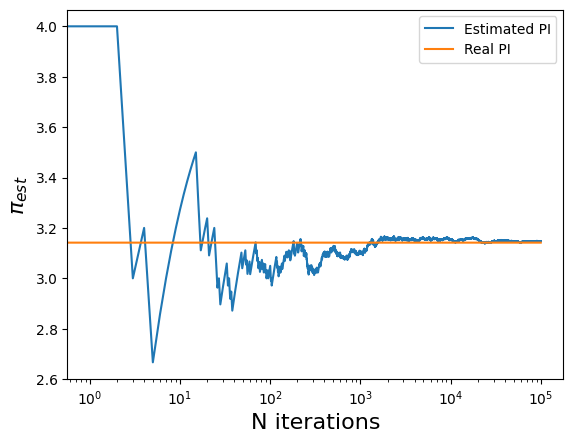

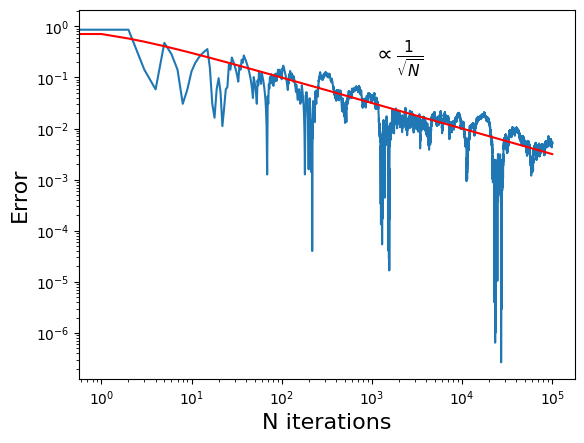

In [3]:
# Assume PI_Approx is already defined 

fontsize = 16
df_PI = PI_Approx(N=100000)
# Plot Estimated PI vs Real PI
plt.figure()
df_PI[['Estimated PI', 'Real PI']].plot(logx=True)
plt.xlabel('N iterations', fontsize=fontsize)
plt.ylabel(r'$\pi_{est}$', fontsize=fontsize)
plt.savefig('Real_vs_Estimated_PI.jpg', bbox_inches='tight', dpi=300)
plt.show()
# Plot Error and Theoretical Scaling
plt.figure()
df_PI['N_scaling'] = 1 / np.sqrt(df_PI.index.values + 1)  # Avoid division by zero if index starts at 0
df_PI['Error'].abs().plot(logy=True, logx=True)
df_PI['N_scaling'].plot(logy=True, logx=True, c='r')
plt.text(1000, 0.2, r'$\propto \frac{1}{\sqrt{N}}$', fontsize=fontsize)
plt.ylabel('Error', fontsize=fontsize)
plt.xlabel('N iterations', fontsize=fontsize)
plt.savefig('Real_vs_Estimated_PI_Scaling.jpg', bbox_inches='tight', dpi=300)
plt.show()

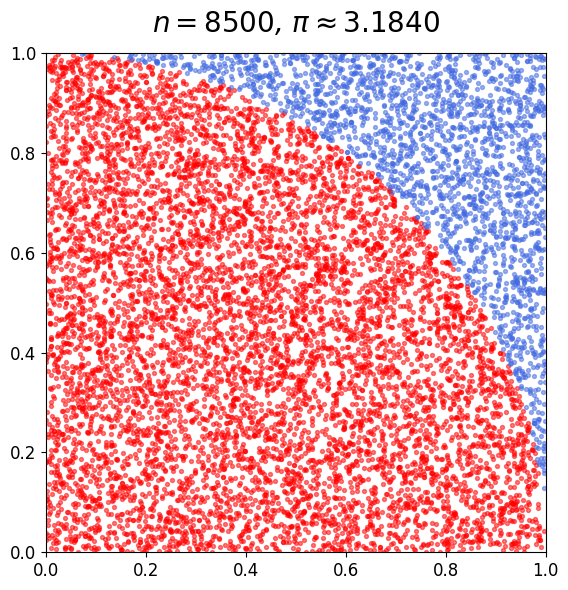

In [4]:
# Scatter plot for n=10000

# Parameters
N = 10000
np.random.seed(42)

# Generate random points in the unit square [0, 1] x [0, 1]
x = np.random.rand(N)
y = np.random.rand(N)

# Check if points are inside the quarter circle
inside = x**2 + y**2 < 1
n_inside = np.sum(inside)
pi_est = 4 * n_inside / N

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(x[inside], y[inside], color='red', s=8, alpha=0.5)
plt.scatter(x[~inside], y[~inside], color='royalblue', s=8, alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust n and pi for the caption to match the image
plt.title(r"$n=8500$, $\pi \approx 3.1840$", fontsize=20, pad=15, loc='center', style='italic')

plt.tight_layout()
plt.savefig("monte_carlo_pi_scatter.png", dpi=300)
plt.show()

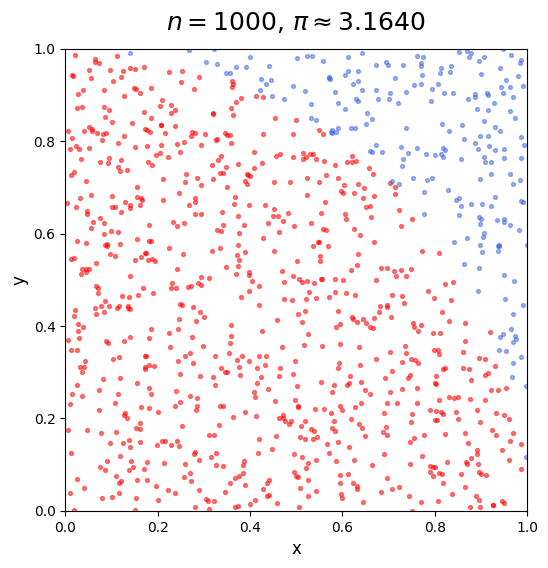

In [5]:
# Scatter plot for n=[1000, 3000, 6000, 9000, 12000, 18000, 24000, 30000] with animation
import matplotlib.animation as animation
N_max = 30000
n_steps = [1000, 3000, 6000, 9000, 12000, 18000, 24000, 30000]
np.random.seed(42)

# Generate random points in the unit square [0, 1] x [0, 1]
x = np.random.rand(N_max)
y = np.random.rand(N_max)
inside = x**2 + y**2 < 1

# Prepare figure
fig, ax = plt.subplots(figsize=(6, 6))
scat_in = ax.scatter([], [], color='red', s=8, alpha=0.5, label='Inside')
scat_out = ax.scatter([], [], color='royalblue', s=8, alpha=0.5, label='Outside')
title = ax.text(0.5, 1.03, '', transform=ax.transAxes, ha='center', va='bottom', fontsize=18)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)

def update(frame):
    n = n_steps[frame]
    mask = np.arange(n)
    in_mask = mask[inside[:n]]
    out_mask = mask[~inside[:n]]

    scat_in.set_offsets(np.column_stack((x[in_mask], y[in_mask])))
    scat_out.set_offsets(np.column_stack((x[out_mask], y[out_mask])))

    n_inside = np.sum(inside[:n])
    pi_est = 4 * n_inside / n
    title.set_text(rf"$n={n}$, $\pi \approx {pi_est:.4f}$")
    return scat_in, scat_out, title

ani = animation.FuncAnimation(fig, update, frames=len(n_steps), interval=1300, blit=True, repeat_delay=1000)
plt.show()

### Monte Carlo sampling– convergence

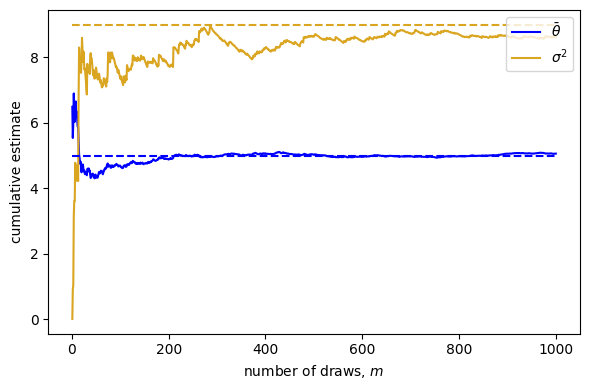

In [6]:
# Simulation parameters
np.random.seed(42)
m = 1000
true_mean = 5
true_var = 9
# Draw samples from N(true_mean, true_var)
samples = np.random.normal(true_mean, np.sqrt(true_var), size=m)
# Compute cumulative estimates
cum_mean = np.cumsum(samples) / (np.arange(1, m+1))
cum_var = np.array([np.var(samples[:i], ddof=0) for i in range(1, m+1)])

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, m+1), cum_mean, label=r'$\bar{\theta}$', color='blue')
plt.plot(np.arange(1, m+1), cum_var, label=r'$\sigma^2$', color='goldenrod')
plt.hlines(true_mean, 1, m, linestyle='--', color='blue')
plt.hlines(true_var, 1, m, linestyle='--', color='goldenrod')
plt.xlabel('number of draws, $m$')
plt.ylabel('cumulative estimate')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('mc_convergence.png', dpi=150)
plt.show()

### Gibbs sampler for a bivariate normal

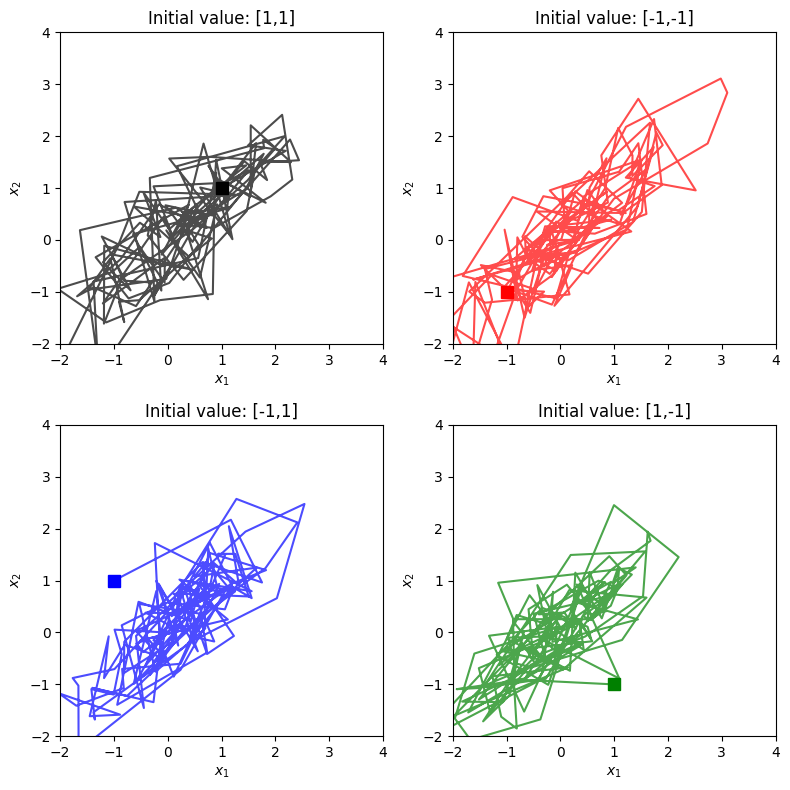

In [7]:
def gibbs_bivar(mu, sigma1, sigma2, rho, theta0, N):
    """
    Gibbs sampler for N draws from a bivariate normal with correlation rho.
    mu = (mu1, mu2)
    sigma1, sigma2 = marginal standard deviations
    theta0 = initial (theta1, theta2)
    Returns array of shape (N,2).
    """
    mu1, mu2 = mu
    samples = np.zeros((N, 2))
    samples[0] = theta0
    # precompute conditional variances
    var1 = sigma1**2 * (1 - rho**2)
    var2 = sigma2**2 * (1 - rho**2)
    for t in range(1, N):
        # sample theta1 | theta2
        cond_mean1 = mu1 + rho * (sigma1/sigma2)*(samples[t-1,1] - mu2)
        samples[t,0] = np.random.normal(cond_mean1, np.sqrt(var1))
        # sample theta2 | theta1
        cond_mean2 = mu2 + rho * (sigma2/sigma1)*(samples[t,0] - mu1)
        samples[t,1] = np.random.normal(cond_mean2, np.sqrt(var2))
    return samples

# Parameters
mu = (0.0, 0.0)
sigma1, sigma2 = 1.0, 1.0
rho = 0.8
N = 150

# Four initializations
inits = [(1,1), (-1,-1), (-1,1), (1,-1)]
colors = ['black', 'red', 'blue', 'green']
titles = ['Initial value: [1,1]', 'Initial value: [-1,-1]',
          'Initial value: [-1,1]', 'Initial value: [1,-1]']

# Run and plot
fig, axes = plt.subplots(2, 2, figsize=(8,8))
for ax, theta0, col, ttl in zip(axes.flatten(), inits, colors, titles):
    chain = gibbs_bivar(mu, sigma1, sigma2, rho, theta0, N)
    
    # Draw the path
    ax.plot(chain[:,0], chain[:,1], '-', color=col, alpha=0.7)
    # Mark initial with a filled square
    ax.plot(chain[0,0], chain[0,1], 's', color=col, markersize=8)
    
    ax.set_title(ttl)
    ax.set_xlim(-2,4)
    ax.set_ylim(-2,4)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')

plt.tight_layout()
plt.savefig('gibbs_bivar_traces.png', dpi=150)
plt.show()

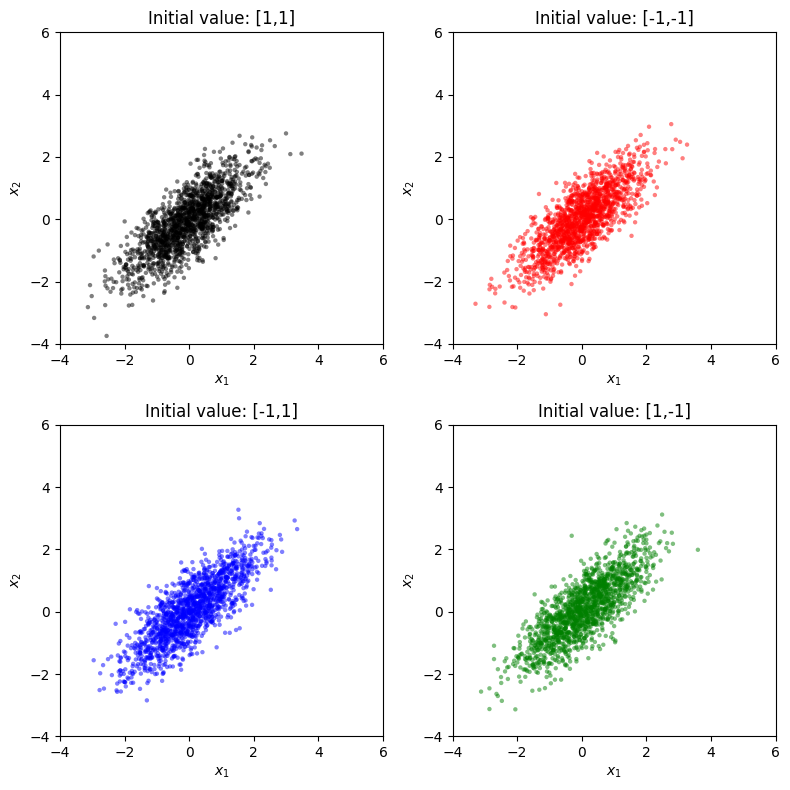

In [8]:
def gibbs_bivar(mu, sigma1, sigma2, rho, theta0, N):
    mu1, mu2 = mu
    samples = np.zeros((N, 2))
    samples[0] = theta0
    var1 = sigma1**2 * (1 - rho**2)
    var2 = sigma2**2 * (1 - rho**2)
    for t in range(1, N):
        m1 = mu1 + rho * (sigma1/sigma2)*(samples[t-1,1] - mu2)
        samples[t,0] = np.random.normal(m1, np.sqrt(var1))
        m2 = mu2 + rho * (sigma2/sigma1)*(samples[t,0] - mu1)
        samples[t,1] = np.random.normal(m2, np.sqrt(var2))
    return samples

# Params
mu = (0.0, 0.0)
sigma1, sigma2 = 1.0, 1.0
rho = 0.8
N = 2000
burn_in = 500

inits = [(1,1), (-1,-1), (-1,1), (1,-1)]
colors = ['black', 'red', 'blue', 'green']
titles = ['Initial value: [1,1]', 'Initial value: [-1,-1]',
          'Initial value: [-1,1]', 'Initial value: [1,-1]']

fig, axes = plt.subplots(2, 2, figsize=(8,8))

for ax, theta0, col, ttl in zip(axes.flatten(), inits, colors, titles):
    chain = gibbs_bivar(mu, sigma1, sigma2, rho, theta0, N)
    # Discard burn-in and optionally thin
    retained = chain[burn_in:]
    
    ax.scatter(retained[:,0], retained[:,1],
               s=10, c=col, alpha=0.5, edgecolor='none')
    ax.set_title(ttl)
    ax.set_xlim(-4,6)
    ax.set_ylim(-4,6)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')

plt.tight_layout()
plt.savefig('gibbs_bivar_scatter.png', dpi=150)
plt.show()

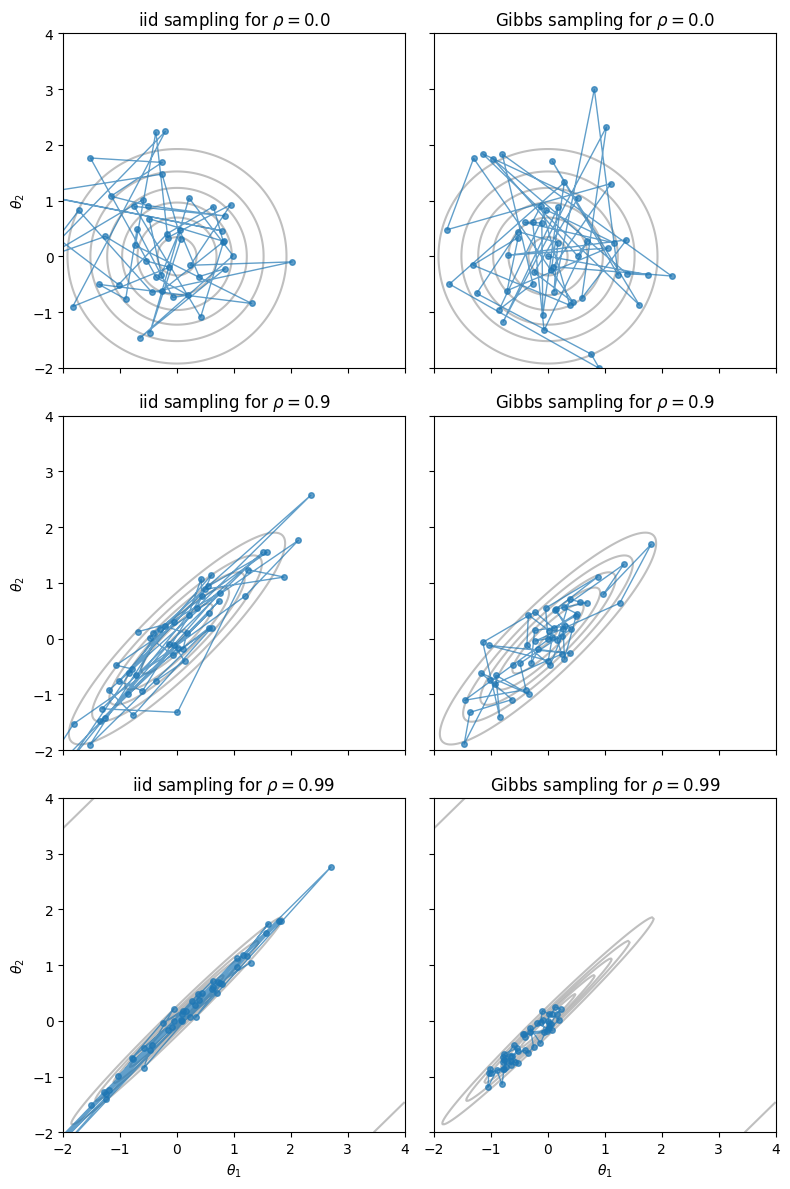

In [9]:
from scipy.stats import multivariate_normal

def gibbs_bivar(mu, sigma1, sigma2, rho, theta0, N):
    mu1, mu2 = mu
    samples = np.zeros((N,2))
    samples[0] = theta0
    var1 = sigma1**2*(1-rho**2)
    var2 = sigma2**2*(1-rho**2)
    for t in range(1,N):
        m1 = mu1 + rho*(sigma1/sigma2)*(samples[t-1,1]-mu2)
        samples[t,0] = np.random.normal(m1, np.sqrt(var1))
        m2 = mu2 + rho*(sigma2/sigma1)*(samples[t,0]-mu1)
        samples[t,1] = np.random.normal(m2, np.sqrt(var2))
    return samples

# Parameters
mu = (0,0)
sigma1, sigma2 = 1.0, 1.0
rhos = [0.0, 0.9, 0.99]
N = 50
theta0 = (0,0)

# Grid for contours
grid = np.linspace(-2,4,200)
X,Y = np.meshgrid(grid, grid)
fig, axes = plt.subplots(3,2, figsize=(8,12), sharex=True, sharey=True)
for i,rho in enumerate(rhos):
    # Build covariance
    Sigma = np.array([[sigma1**2, rho*sigma1*sigma2],
                      [rho*sigma1*sigma2, sigma2**2]])
    # True density
    rv = multivariate_normal(mean=mu, cov=Sigma)
    Z = rv.pdf(np.dstack([X,Y]))

    # IID draws
    iid = rv.rvs(size=N)

    # Gibbs draws
    gibbs = gibbs_bivar(mu, sigma1, sigma2, rho, theta0, N)

    for j,(data,title) in enumerate(zip([iid, gibbs], ['iid sampling', 'Gibbs sampling'])):
        ax = axes[i,j]
        # contours
        cs = ax.contour(X, Y, Z, levels=6, colors='gray', alpha=0.5)
        # path
        ax.plot(data[:,0], data[:,1], '-o', color='C0', markersize=4, alpha=0.7, linewidth=1)
        ax.set_title(f'{title} for $\\rho={rho}$')
        if i==2:
            ax.set_xlabel(r'$\theta_1$')
        if j==0:
            ax.set_ylabel(r'$\theta_2$')
        ax.set_xlim(-2,4)
        ax.set_ylim(-2,4)

plt.tight_layout()
plt.savefig('direct_vs_gibbs.png', dpi=150)
plt.show()

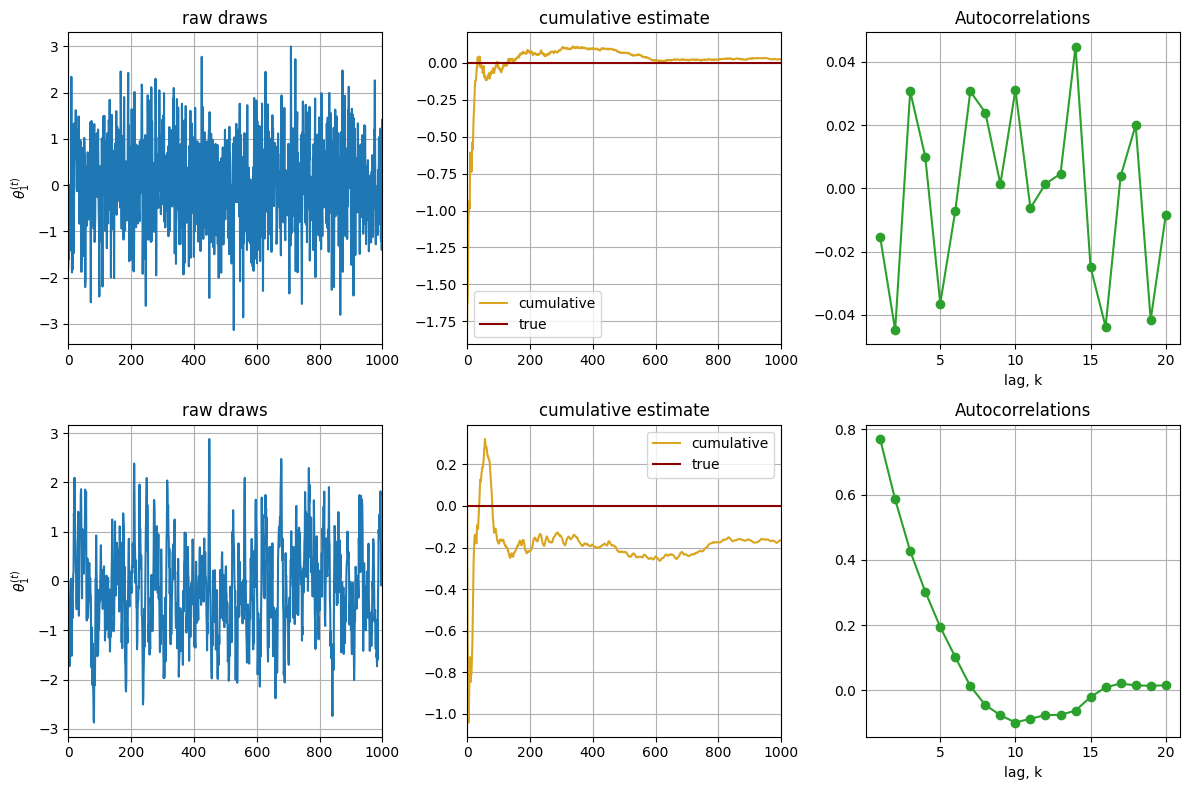

In [10]:
# Parameters
np.random.seed(0)
m = 1000
mu = (0, 0)
sigma1, sigma2 = 1.0, 1.0
rho = 0.9

# Covariance matrix and direct samples
Sigma = np.array([[sigma1**2, rho*sigma1*sigma2],
                  [rho*sigma1*sigma2, sigma2**2]])
direct = np.random.multivariate_normal(mu, Sigma, size=m)

# Gibbs sampler
def gibbs(mu, sigma1, sigma2, rho, theta0, m):
    samples = np.zeros((m, 2))
    samples[0] = theta0
    var1 = sigma1**2 * (1 - rho**2)
    var2 = sigma2**2 * (1 - rho**2)
    for t in range(1, m):
        # theta1 | theta2
        m1 = mu[0] + rho*(sigma1/sigma2)*(samples[t-1,1] - mu[1])
        samples[t,0] = np.random.normal(m1, np.sqrt(var1))
        # theta2 | theta1
        m2 = mu[1] + rho*(sigma2/sigma1)*(samples[t,0] - mu[0])
        samples[t,1] = np.random.normal(m2, np.sqrt(var2))
    return samples

gibbs_samples = gibbs(mu, sigma1, sigma2, rho, (0, 0), m)

# Compute cumulative mean for theta1
cum_direct = np.cumsum(direct[:,0]) / (np.arange(1, m+1))
cum_gibbs = np.cumsum(gibbs_samples[:,0]) / (np.arange(1, m+1))

# Autocorrelation for theta1 for k up to 20
def autocorr(x, k):
    n = len(x)
    x_mean = np.mean(x)
    c0 = np.sum((x - x_mean)**2) / n
    return np.array([np.sum((x[:n-k] - x_mean)*(x[k:] - x_mean)) / n / c0 for k in range(1, k+1)])

acor_direct = autocorr(direct[:,0], 20)
acor_gibbs = autocorr(gibbs_samples[:,0], 20)

# Plot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Top row: direct
axes[0,0].plot(direct[:,0], color='C0')
axes[0,0].set_title('raw draws')
axes[0,0].set_ylabel(r'$\theta_1^{(t)}$')
axes[0,0].set_xlim(0, m)
axes[0,1].plot(cum_direct, color='goldenrod', label='cumulative')
axes[0,1].axhline(mu[0], color='darkred', label='true')
axes[0,1].set_title('cumulative estimate')
axes[0,1].legend()
axes[0,1].set_xlim(0, m)
axes[0,2].plot(np.arange(1, 21), acor_direct, marker='o', color='C2')
axes[0,2].set_title('Autocorrelations')
axes[0,2].set_xlabel('lag, k')

# Bottom row: Gibbs
axes[1,0].plot(gibbs_samples[:,0], color='C0')
axes[1,0].set_title('raw draws')
axes[1,0].set_ylabel(r'$\theta_1^{(t)}$')
axes[1,0].set_xlim(0, m)
axes[1,1].plot(cum_gibbs, color='goldenrod', label='cumulative')
axes[1,1].axhline(mu[0], color='darkred', label='true')
axes[1,1].set_title('cumulative estimate')
axes[1,1].legend()
axes[1,1].set_xlim(0, m)
axes[1,2].plot(np.arange(1, 21), acor_gibbs, marker='o', color='C2')
axes[1,2].set_title('Autocorrelations')
axes[1,2].set_xlabel('lag, k')

for ax in axes.flatten():
    ax.grid(True)

plt.tight_layout()
plt.savefig('direct_vs_gibbs_rho09.png', dpi=150)
plt.show()

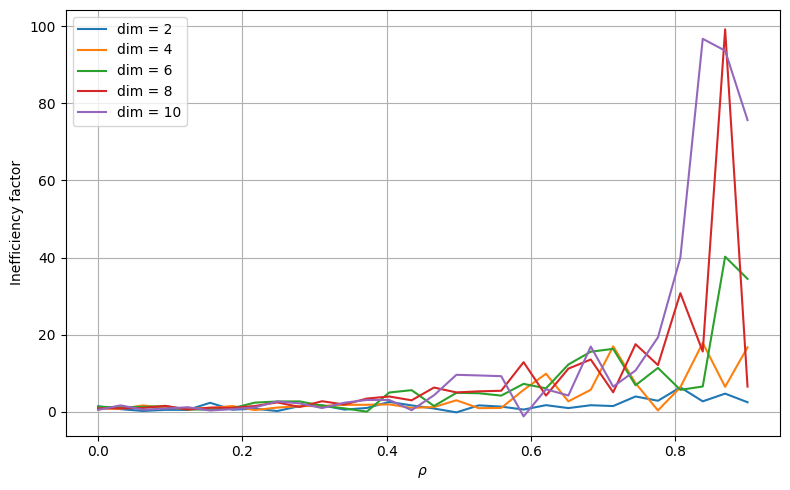

In [12]:
def gibbs_mv_normal(p, rho, n_samples, burn_in=1000):
    """
    Runs a simple Gibbs sampler on a zero-mean, isotropic 
    multivariate normal of dimension p, correlation rho.
    Returns one coordinate's chain after burn-in.
    """
    # Build covariance and compute conditional variance
    Sigma = np.full((p, p), rho)
    np.fill_diagonal(Sigma, 1.0)
    inv_Sigma = np.linalg.inv(Sigma)
    
    # Precompute conditional precisions
    # In a Gaussian, full conditional of theta_i is Normal with:
    # Var_i = 1 / (precision_ii)
    prec = inv_Sigma
    cond_vars = 1.0 / np.diag(prec)
    
    x = np.zeros(p)
    chain = np.zeros(n_samples)
    for t in range(n_samples):
        for i in range(p):
            # conditional mean = -1/prec_ii * sum_{j≠i} prec_{ij} x_j
            mean_i = - (prec[i,:] @ x - prec[i,i]*x[i]) / prec[i,i]
            x[i] = np.random.normal(mean_i, np.sqrt(cond_vars[i]))
        chain[t] = x[0]   # track first coordinate
    return chain

def inefficiency(chain, max_lag=200):
    """Estimate IF = 1 + 2 sum_{k=1}^∞ rho_k, approximated to max_lag."""
    x = chain - np.mean(chain)
    n = len(x)
    var0 = np.var(x)
    rhos = [(x[:n-k] * x[k:]).mean() / var0 for k in range(1, max_lag+1)]
    return 1 + 2*np.sum(rhos)

# Simulation parameters
n_samples = 5000
rhos = np.linspace(0, 0.9, 30)
dims = [2,4,6,8,10]

plt.figure(figsize=(8,5))
for p, color in zip(dims, plt.rcParams['axes.prop_cycle'].by_key()['color'][:len(dims)]):
    IFs = []
    for rho in rhos:
        chain = gibbs_mv_normal(p, rho, n_samples)
        # drop initial half as burn-in
        IFs.append(inefficiency(chain[n_samples//2:], max_lag=200))
    plt.plot(rhos, IFs, label=f'dim = {p}', color=color)

plt.xlabel(r'$\rho$')
plt.ylabel('Inefficiency factor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('gibbs_inefficiency.png', dpi=150)
plt.show()

# Illustration of mixture of normals

<>:61: SyntaxWarning: invalid escape sequence '\c'
<>:62: SyntaxWarning: invalid escape sequence '\c'
<>:61: SyntaxWarning: invalid escape sequence '\c'
<>:62: SyntaxWarning: invalid escape sequence '\c'
C:\Users\crist\AppData\Local\Temp\ipykernel_33524\979218622.py:61: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(xs, chn.pdf(np.exp(xs))*np.exp(xs), 'k--', label='log $\chi^2_1$')
C:\Users\crist\AppData\Local\Temp\ipykernel_33524\979218622.py:62: SyntaxWarning: invalid escape sequence '\c'
  ax.legend(['comp 1','comp 2','comp 3','comp 4','comp 5','mixture','log $\chi^2_1$'])


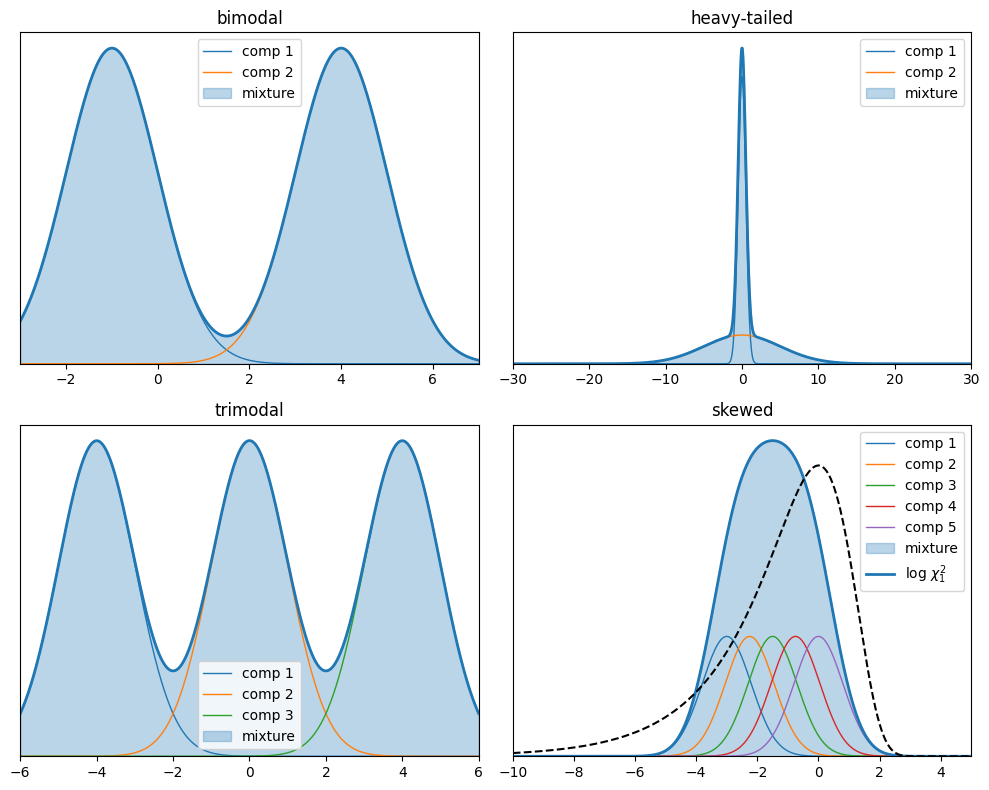

In [13]:
from scipy.stats import norm, chi2

def plot_mixture(ax, components, weights=None, xlim=(-10,10)):
    """
    Plot individual normal components and the mixture density.
    components: list of (mu, sigma) tuples.
    weights: list of same length, summing to 1. If None, equal weights.
    """
    xs = np.linspace(xlim[0], xlim[1], 1000)
    if weights is None:
        weights = np.ones(len(components)) / len(components)
    # compute each component density
    ys = [w * norm.pdf(xs, mu, sigma) 
          for (mu, sigma), w in zip(components, weights)]
    # mixture
    ymix = np.sum(ys, axis=0)
    # plot components
    for y, (mu, sigma) in zip(ys, components):
        ax.plot(xs, y, linewidth=1)
    # plot mixture
    ax.fill_between(xs, ymix, color='C0', alpha=0.3)
    ax.plot(xs, ymix, color='C0', linewidth=2, label='mixture')
    ax.set_xlim(xlim)
    ax.set_ylim(0, None)
    ax.grid(False)

fig, axes = plt.subplots(2, 2, figsize=(10,8))

# 1) Bimodal
ax = axes[0,0]
ax.set_title('bimodal')
comps = [(-1,1), (4,1)]
plot_mixture(ax, comps, weights=[0.5,0.5], xlim=(-3,7))
ax.legend(['comp 1','comp 2','mixture'])

# 2) Heavy‐tailed: mix a narrow and wide normal
ax = axes[0,1]
ax.set_title('heavy‐tailed')
comps = [(0,0.5), (0,5)]
plot_mixture(ax, comps, weights=[0.5,0.5], xlim=(-30,30))
ax.legend(['comp 1','comp 2','mixture'])

# 3) Trimodal
ax = axes[1,0]
ax.set_title('trimodal')
comps = [(-4,1), (0,1), (4,1)]
plot_mixture(ax, comps, weights=[1/3]*3, xlim=(-6,6))
ax.legend(['comp 1','comp 2','comp 3','mixture'])

# 4) Skewed: 5 components approximating log‐chi2
ax = axes[1,1]
ax.set_title('skewed')
# five normals around log-chi2(1)
chn = chi2(df=1)
xs = np.linspace(-10,5,1000)
# compute target log-chi2 via transform y = log(x) but for simplicity we overlay
# here we'll plot mixture of five shifted normals
centers = np.linspace(-3,0,5)
comps = [(c,0.8) for c in centers]
plot_mixture(ax, comps, weights=[0.2]*5, xlim=(-10,5))
ax.plot(xs, chn.pdf(np.exp(xs))*np.exp(xs), 'k--', label='log $\chi^2_1$')
ax.legend(['comp 1','comp 2','comp 3','comp 4','comp 5','mixture','log $\chi^2_1$'])

for ax in axes.flatten():
    ax.set_yticks([])

plt.tight_layout()
plt.savefig('mixture_illustration.png', dpi=150)
plt.show()

# Fish length data with known yearly cohorts

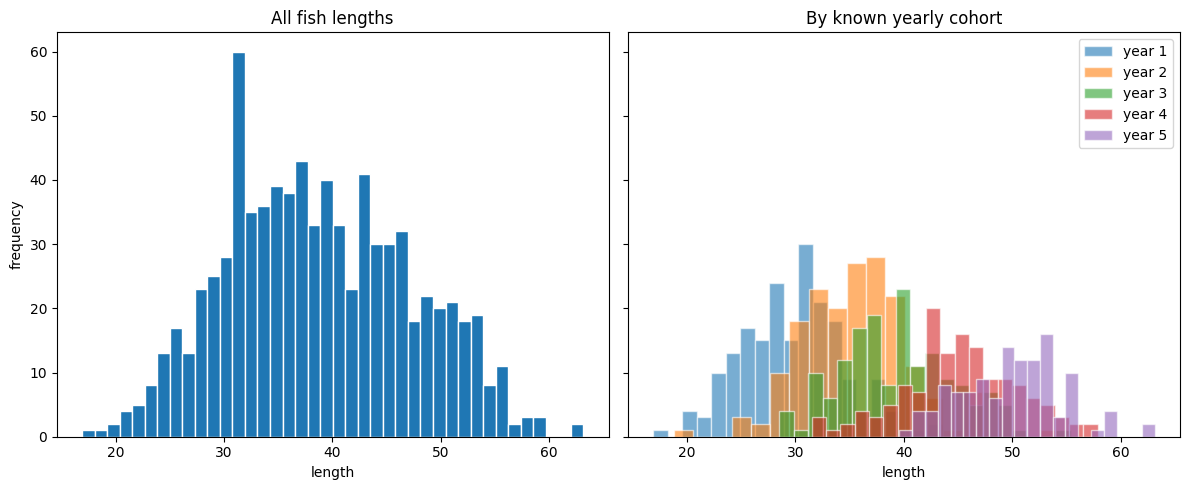

In [14]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate five cohorts with different means and common variance
cohort_sizes = [200, 180, 160, 140, 120]
cohort_means = [30, 35, 40, 45, 50]
cohort_sd    = 5

data = []
labels = []
for year, (size, mean) in enumerate(zip(cohort_sizes, cohort_means), start=1):
    lengths = np.random.normal(mean, cohort_sd, size=size)
    data.append(lengths)
    labels.append(f'year {year}')

# Flatten all data for the overall plot
all_lengths = np.hstack(data)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Left: overall histogram
axes[0].hist(all_lengths, bins=40, color='C0', edgecolor='white')
axes[0].set_title('All fish lengths')
axes[0].set_xlabel('length')
axes[0].set_ylabel('frequency')
axes[0].grid(False)

# Right: cohort‐wise histograms
colors = ['C0','C1','C2','C3','C4']
for lengths, lbl, c in zip(data, labels, colors):
    axes[1].hist(lengths, bins=20, alpha=0.6, density=False,
                 label=lbl, color=c, edgecolor='white')
axes[1].set_title('By known yearly cohort')
axes[1].set_xlabel('length')
axes[1].legend()
axes[1].grid(False)

plt.tight_layout()
plt.savefig('fish_lengths.png', dpi=150)
plt.show()

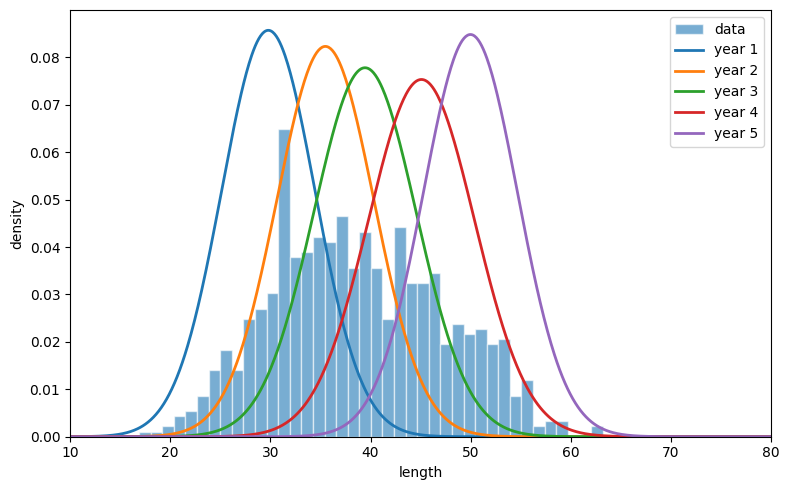

In [15]:
from scipy.stats import norm

# (Re)simulate the data
np.random.seed(42)
cohort_sizes = [200, 180, 160, 140, 120]
cohort_means = [30, 35, 40, 45, 50]
cohort_sd_true = 5

data = []
for size, mean in zip(cohort_sizes, cohort_means):
    data.append(np.random.normal(mean, cohort_sd_true, size))
all_data = np.hstack(data)

# Fit each cohort: estimate mean & sd
fits = [(np.mean(c), np.std(c, ddof=1)) for c in data]
years = [f'year {i}' for i in range(1, 6)]
colors = ['C0','C1','C2','C3','C4']

# Plot
fig, ax = plt.subplots(figsize=(8,5))

# Histogram of all data (density)
ax.hist(all_data, bins=40, density=True,
        color='C0', edgecolor='white', alpha=0.6, label='data')

# Overlay each cohort's fitted Normal pdf
xs = np.linspace(10, 80, 800)
for (mu_hat, sd_hat), label, c in zip(fits, years, colors):
    pdf = norm.pdf(xs, loc=mu_hat, scale=sd_hat)
    ax.plot(xs, pdf, color=c, linewidth=2, label=label)

ax.set_xlabel('length')
ax.set_ylabel('density')
ax.set_xlim(10,80)
ax.legend()
plt.tight_layout()
plt.savefig('fish_fit.png', dpi=150)
plt.show()

# Fish length data - mixture of normals fit

\\?\C:\Users\crist\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
\\?\C:\Users\crist\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
\\?\C:\Users\crist\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
\\?\C:\Users\

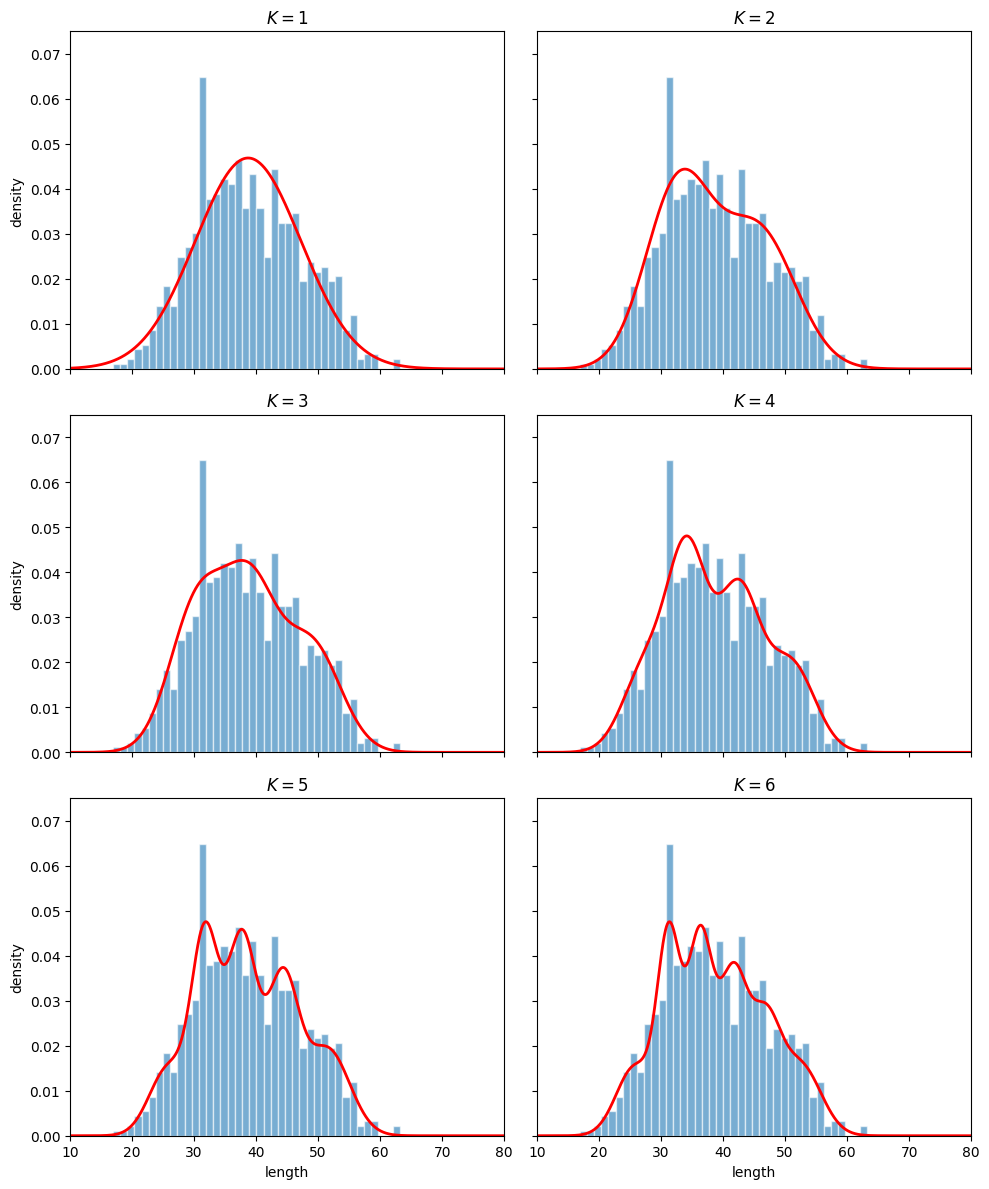

In [16]:
from sklearn.mixture import GaussianMixture

# (Re)simulate fish lengths data
np.random.seed(42)
cohort_sizes  = [200, 180, 160, 140, 120]
cohort_means  = [30, 35, 40, 45, 50]
cohort_sd_true = 5
data = []
for size, mean in zip(cohort_sizes, cohort_means):
    data.append(np.random.normal(mean, cohort_sd_true, size))
all_data = np.hstack(data)[:, np.newaxis]  # shape (N,1)

# Prepare x‐grid for density plots
xs = np.linspace(10, 80, 1000)[:, np.newaxis]

fig, axes = plt.subplots(3, 2, figsize=(10,12), sharex=True, sharey=True)

for idx, K in enumerate(range(1,7)):
    ax = axes.flatten()[idx]
    
    # Fit GMM with K components
    gmm = GaussianMixture(n_components=K, covariance_type='full', random_state=0)
    gmm.fit(all_data)
    
    # Histogram of data
    ax.hist(all_data.ravel(), bins=40, density=True,
            color='C0', edgecolor='white', alpha=0.6)
    
    # Compute mixture density
    logprob = gmm.score_samples(xs)
    pdf = np.exp(logprob)
    ax.plot(xs.ravel(), pdf, 'r-', linewidth=2)
    
    ax.set_title(f'$K={K}$')
    ax.set_xlim(10,80)
    ax.set_ylim(0, 0.075)
    if idx % 2 == 0:
        ax.set_ylabel('density')
    if idx >= 4:
        ax.set_xlabel('length')

plt.tight_layout()
plt.savefig('fish_mix_fit.png', dpi=150)
plt.show()

# MCMC

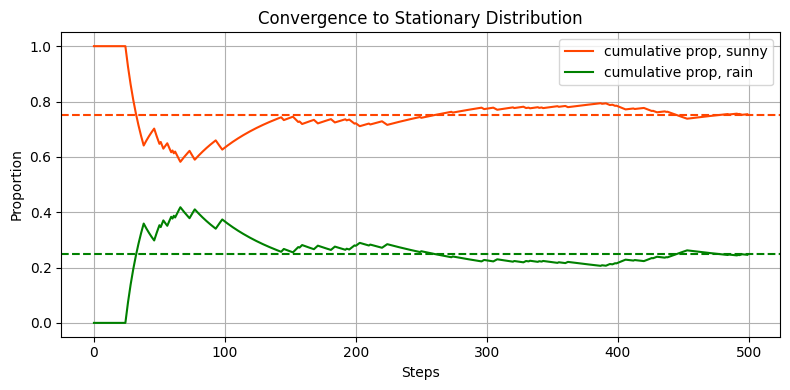

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix for weather example
P = np.array([[0.9, 0.1],   # sunny -> [sunny, rain]
              [0.3, 0.7]])  # rain -> [sunny, rain]

states = ['sunny', 'rain']
state_index = {'sunny': 0, 'rain': 1}
num_states = len(states)

# Start in sunny state
current = 0
T = 500
samples = [current]

# Simulate the Markov Chain
for _ in range(T-1):
    current = np.random.choice(num_states, p=P[current])
    samples.append(current)

# Convert samples to numpy array
samples = np.array(samples)

# Compute cumulative proportions
cumulative_props = np.cumsum(samples[:, None] == np.arange(num_states), axis=0) / np.arange(1, T+1)[:, None]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(cumulative_props[:, 0], label='cumulative prop, sunny', color='orangered')
plt.plot(cumulative_props[:, 1], label='cumulative prop, rain', color='green')
plt.axhline(0.75, linestyle='--', color='orangered')
plt.axhline(0.25, linestyle='--', color='green')
plt.xlabel('Steps')
plt.ylabel('Proportion')
plt.title('Convergence to Stationary Distribution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("mcmc_stationary_convergence.png")
plt.show()

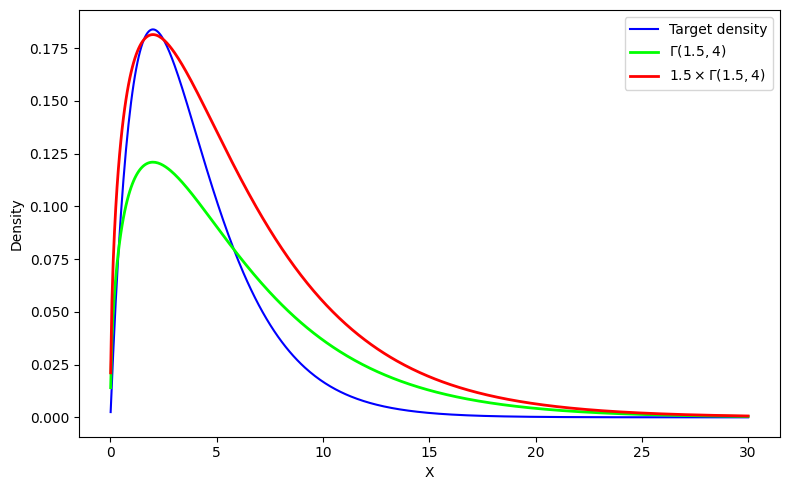

In [18]:
from scipy.stats import gamma

# X-axis range
x = np.linspace(0.01, 30, 500)

# Target density: Gamma(2, 2)
target = gamma(a=2, scale=2).pdf(x)

# Proposal distribution: Gamma(1.5, 4)
proposal = gamma(a=1.5, scale=4).pdf(x)

# Scaled proposal: c * proposal (e.g., c = 1.5)
scaled_proposal = 1.5 * proposal

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, target, label='Target density', color='blue')
plt.plot(x, proposal, label=r'$\Gamma(1.5,4)$', color='lime', linewidth=2)
plt.plot(x, scaled_proposal, label=r'$1.5 \times \Gamma(1.5,4)$', color='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig("rejection_sampling_plot.png")
plt.show()

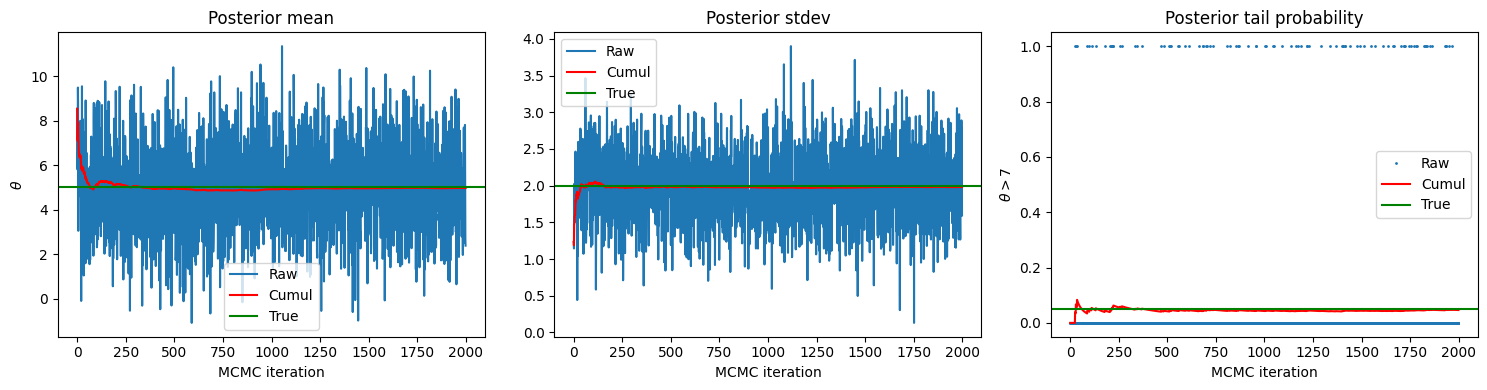

In [19]:
# Re-import libraries due to kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Simulate MCMC chain
np.random.seed(0)
N = 2000
true_mean = 5
true_std = 2

# Raw chain
raw_chain = np.random.normal(loc=true_mean, scale=true_std, size=N)
cumsum_chain = np.cumsum(raw_chain)
cumul_chain = cumsum_chain / np.arange(1, N+1)

# Simulate posterior stdev
raw_stdev = np.random.normal(loc=true_std, scale=0.5, size=N)
cumsum_stdev = np.cumsum(raw_stdev)
cumul_stdev = cumsum_stdev / np.arange(1, N+1)

# Posterior tail probability
tail_events = (np.random.rand(N) > 0.95).astype(int)
cumul_tail = np.cumsum(tail_events) / np.arange(1, N+1)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Posterior mean
axs[0].plot(raw_chain, label='Raw')
axs[0].plot(cumul_chain, label='Cumul', color='red')
axs[0].axhline(true_mean, color='green', label='True')
axs[0].set_title('Posterior mean')
axs[0].set_xlabel('MCMC iteration')
axs[0].set_ylabel(r'$\theta$')
axs[0].legend()

# Posterior stdev
axs[1].plot(raw_stdev, label='Raw')
axs[1].plot(cumul_stdev, label='Cumul', color='red')
axs[1].axhline(true_std, color='green', label='True')
axs[1].set_title('Posterior stdev')
axs[1].set_xlabel('MCMC iteration')
axs[1].legend()

# Posterior tail probability
axs[2].plot(tail_events, label='Raw', linestyle='None', marker='.', markersize=2)
axs[2].plot(cumul_tail, label='Cumul', color='red')
axs[2].axhline(0.05, color='green', label='True')
axs[2].set_title('Posterior tail probability')
axs[2].set_xlabel('MCMC iteration')
axs[2].set_ylabel(r'$\theta > 7$')
axs[2].legend()

plt.tight_layout()
plt.show()

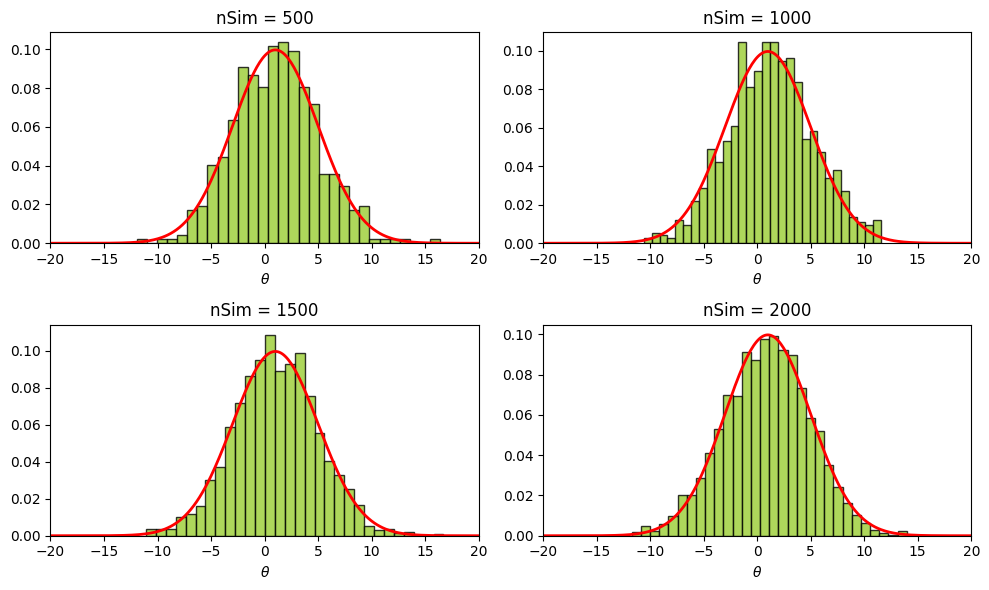

In [20]:
from scipy.stats import norm

# Settings
true_mean = 1
true_std = 4
sample_sizes = [500, 1000, 1500, 2000]
np.random.seed(42)

# Simulate noisy estimates of target distribution
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

for i, n in enumerate(sample_sizes):
    samples = np.random.normal(loc=true_mean, scale=true_std, size=n)
    ax = axs[i]
    ax.hist(samples, bins=30, density=True, color='yellowgreen', alpha=0.8, edgecolor='black')
    
    # Plot the true density
    x = np.linspace(-20, 20, 300)
    ax.plot(x, norm.pdf(x, loc=true_mean, scale=true_std), 'r', lw=2)
    ax.set_title(f"nSim = {n}")
    ax.set_xlim([-20, 20])
    ax.set_xlabel(r"$\theta$")

fig.tight_layout()
plt.savefig("burnin_convergence_panels.png", dpi=300)
